### **Análise dos dados**

Segue abaixo a análise dos dados inicialmente fornecidos.

Imports

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
import seaborn as sns

import matplotlib.pyplot as plt

Inicializando os dados

In [7]:
df_resultados = pd.read_csv('../data/RESULTADOS_04_06_2024_full_teste.csv', compression='gzip')
df_resultados2 = pd.read_csv('../data/RESULTADOS_02_03_2024_full_teste.csv', compression='gzip')
df_falhas = pd.read_csv('../data/FALHAS_04_05_06_2024.csv')

Checando os dados

In [8]:
# Remover coluna errada
df_resultados = df_resultados.drop(columns=['Unnamed: 0'], axis=1)
df_resultados2 = df_resultados2.drop(columns=['Unnamed: 0'], axis=1)



In [9]:
df_falhas = df_falhas.drop(columns=['Unnamed: 0'], axis=1)

Arrumar os dados de falha

In [10]:
df_falhas.columns = df_falhas.iloc[0]

df_falhas = df_falhas.drop(df_falhas.index[0])

Checar ambos DFs

In [11]:
df_falhas.head()

,KNR,MODELO,COR,MOTOR,ESTACAO,USUARIO,HALLE,FALHA,DATA
1,2023-2056234,T-CROSS,2R2R,DHS,HCEQS506,4013334,ZP7,PARALAMA DIANTEIRO 01. AMASSADO,20/5/2024 21:31:52
2,2023-2056234,T-CROSS,2R2R,DHS,HCEQS506,4013334,ZP7,PORTA TRASEIRA 04. CAROÇO / PICO,20/5/2024 21:30:23
3,2023-2056234,T-CROSS,2R2R,DHS,PCEQS620,2058570,ZP6,MÓDULO DO ACC (13) PEÇA INCORRETA ¨,20/5/2024 20:04:56
4,2023-2056234,T-CROSS,2R2R,DHS,PCEQS999,2087715,ESPC,TAMPA TRASEIRA 05. SUJEIRA NA PINTURA,11/4/2024 12:15:40
5,2023-3896001,T-CROSS,0Q0Q,,HCEQS203,2043971,ZP5A,TAMPA DIANTEIRA 05. SUJEIRA NA PINTURA,5/6/2024 17:38:52


Analisando os tipos de dados de falhas

In [12]:
df_falhas.describe()

,KNR,MODELO,COR,MOTOR,ESTACAO,USUARIO,HALLE,FALHA,DATA
count,328901,328901,328901,328901,328891,328891,328106,328901,328901
unique,23972,1,11,5,61,366,27,4778,164880
top,2024-1746005,T-CROSS,K2K2,DHS,HCEQS506,FHQWRAP,ZP7,PAINEL LATERAL 05. SUJEIRA NA PINTURA,7/6/2024 15:07:27
freq,94,328901,86931,194962,153670,19299,86585,13146,10


In [13]:
df_resultados.head(20)

,KNR,NAME,ID,STATUS,UNIT,VALUE_ID,VALUE,DATA
0,2023-2056234,012001,1,10,NaN,NaN,NaN,2024-05-16 13:41:25
1,2023-2056234,012002,1,10,NaN,NaN,NaN,2024-05-16 14:12:35
2,2023-2056234,012003,1,10,NaN,NaN,NaN,2024-05-16 14:12:27
3,2023-2056234,012004,1,10,NaN,NaN,NaN,2024-05-16 14:11:07
4,2023-2056234,012008,1,10,NaN,NaN,NaN,2024-05-16 14:13:07
5,2023-2056234,018001,1,10,NaN,NaN,NaN,2024-05-16 14:02:19
6,2023-2056234,042000,1,10,Deg,5.0,15601 ...,2024-05-16 13:21:03
7,2023-2056234,042000,1,10,mm,3.0,1.69 ...,2024-05-16 13:21:03
8,2023-2056234,042000,1,10,mm,2.0,1.98 ...,2024-05-16 13:21:03
9,2023-2056234,042000,1,10,mm,1.0,3.67 ...,2024-05-16 13:21:03


Após está analise, creio que os dados de ambas as tabelas que não serão utilizados tanto no treinamento quanto teste do modelo são:

#### Falhas:

- KNR
- Estação
- Data

#### Resultados:

- KNR
- Name
- Data

OBS(Futuramente a coluna Data pode ser utilizada para criar novas features)
OBS2(Colunas KNR e Name serão removidas apenas antes do treinamento do modelo)

## Preparação dos dados

Inicialmente, os dados serão integrados em uma única tabela

In [14]:
# Remoção das linhas com NaN

df_falhas = df_falhas.dropna()
df_resultados = df_resultados.dropna()
df_resultados2 = df_resultados2.dropna()

In [15]:
df_resultados.head()

,KNR,NAME,ID,STATUS,UNIT,VALUE_ID,VALUE,DATA
6,2023-2056234,042000,1,10,Deg,5.0,15601 ...,2024-05-16 13:21:03
7,2023-2056234,042000,1,10,mm,3.0,1.69 ...,2024-05-16 13:21:03
8,2023-2056234,042000,1,10,mm,2.0,1.98 ...,2024-05-16 13:21:03
9,2023-2056234,042000,1,10,mm,1.0,3.67 ...,2024-05-16 13:21:03
10,2023-2056234,042000,1,10,Nm,4.0,2.93 ...,2024-05-16 13:21:03


Convertendo a coluna DATA para um formato melhor

In [16]:
df_resultados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19717629 entries, 6 to 21674251
Data columns (total 8 columns):
 #   Column    Dtype  
---  ------    -----  
 0   KNR       object 
 1   NAME      object 
 2   ID        int64  
 3   STATUS    int64  
 4   UNIT      object 
 5   VALUE_ID  float64
 6   VALUE     object 
 7   DATA      object 
dtypes: float64(1), int64(2), object(5)
memory usage: 1.3+ GB


In [20]:
# Salvando os dados em "parquet" é mais rápido para leitura

df_resultados.to_parquet('../data/df_resultados.parquet', index=False)
df_resultados2.to_parquet('../data/df_resultados2.parquet', index=False)

In [21]:
# Limpando colunas que não serão usadas agora

colunas = ['UNIT', 'VALUE_ID', 'VALUE']

df_resultados2 = df_resultados2.drop(columns=colunas, axis=1)
df_resultados = df_resultados.drop(columns=colunas, axis=1)

In [22]:
# Transformando os DFs de resultados em apenas um DF de resultados maior

df = pd.concat([df_resultados, df_resultados2])

In [23]:
# Transformando data em datetime do pandas

df['DATA'] = pd.to_datetime(df['DATA'], errors='coerce')

Segue abaixo o código para a preparação dos dados

In [24]:
def aggregate_by_id(df, id_value):
    subset = df[df['ID'] == id_value]
    return subset.groupby('KNR').agg(
        NAME=('NAME', 'count'),  # Conta total de NAME
        SOK=('STATUS', lambda x: (x == 10).sum()),
        SNOK=('STATUS', lambda x: (x == 13).sum()),
        DATA=('DATA', lambda x: (x.max() - x.min()).total_seconds() / (3600*24))
    ).rename(columns={
        'NAME': f'ID{id_value}NAME',
        'SOK': f'ID{id_value}SOK',
        'SNOK': f'ID{id_value}SNOK',
        'DATA': f'ID{id_value}DATA'
    })

# Agregando para cada ID
id1 = aggregate_by_id(df, 1)
id2 = aggregate_by_id(df, 2)
id718 = aggregate_by_id(df, 718)

# Combinando os resultados em um único DataFrame
final_df = id1.join(id2, on='KNR', how='outer').join(id718, on='KNR', how='outer').reset_index()

# Adicionando UNIQUE_ID com valores incrementais

# Reordenando as colunas para o formato desejado
final_df = final_df[['KNR','ID1NAME', 'ID1SOK', 'ID1SNOK', 'ID1DATA', 'ID2NAME', 'ID2SOK', 'ID2SNOK', 'ID2DATA', 'ID718NAME', 'ID718SOK', 'ID718SNOK', 'ID718DATA']]

# Exibindo o resultado
print(final_df)

                KNR  ID1NAME  ID1SOK  ID1SNOK  ID1DATA  ID2NAME  ID2SOK  \
0      2023-2056234      5.0     5.0      0.0      0.0    770.0   766.0   
1      2023-5076008      NaN     NaN      NaN      NaN      NaN     NaN   
2      2023-5076015      NaN     NaN      NaN      NaN      NaN     NaN   
3      2024-0516009      NaN     NaN      NaN      NaN     16.0    16.0   
4      2024-0526019      NaN     NaN      NaN      NaN      NaN     NaN   
...             ...      ...     ...      ...      ...      ...     ...   
35312  2024-2976009      NaN     NaN      NaN      NaN     72.0    72.0   
35313  2024-2976010      NaN     NaN      NaN      NaN     72.0    72.0   
35314  2024-2976011      NaN     NaN      NaN      NaN     74.0    74.0   
35315  2024-2976012      NaN     NaN      NaN      NaN     82.0    82.0   
35316  2024-2976013      NaN     NaN      NaN      NaN     72.0    72.0   

       ID2SNOK   ID2DATA  ID718NAME  ID718SOK  ID718SNOK  ID718DATA  
0          4.0  4.491227     

In [25]:
# Colocar 0 no lugar de NaN para evitar problemas
final_df = final_df.fillna(0)

In [26]:
final_df.head(10)

,KNR,ID1NAME,ID1SOK,ID1SNOK,ID1DATA,ID2NAME,ID2SOK,ID2SNOK,ID2DATA,ID718NAME,ID718SOK,ID718SNOK,ID718DATA
0,2023-2056234,5.0,5.0,0.0,0.0,770.0,766.0,4.0,4.491227,71.0,71.0,0.0,4.231748
1,2023-5076008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,3.0,1.0,2.0,0.037674
2,2023-5076015,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,2.0,1.0,1.0,0.018345
3,2024-0516009,0.0,0.0,0.0,0.0,16.0,16.0,0.0,0.019792,32.0,32.0,0.0,3.687118
4,2024-0526019,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,1.0,0.0,0.000000
5,2024-0526096,0.0,0.0,0.0,0.0,4.0,4.0,0.0,0.000000,45.0,44.0,1.0,0.066921
6,2024-0526150,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,1.0,0.0,0.000000
7,2024-0526245,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,1.0,0.0,0.000000
8,2024-0526426,0.0,0.0,0.0,0.0,4.0,4.0,0.0,0.000000,36.0,36.0,0.0,0.114201
9,2024-0536077,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,2.0,1.0,1.0,0.041539


In [27]:
# Checar o tamanho do DataFrame

final_df.shape

(35317, 13)

Arrumando o DF de Falhas


In [28]:
# Deixa todas as falhas em letra maiuscula
df_falhas['FALHA'] = df_falhas['FALHA'].str.upper()

In [29]:
# Checa o DataFrame
df_falhas.head()

,KNR,MODELO,COR,MOTOR,ESTACAO,USUARIO,HALLE,FALHA,DATA
1,2023-2056234,T-CROSS,2R2R,DHS,HCEQS506,4013334,ZP7,PARALAMA DIANTEIRO 01. AMASSADO,20/5/2024 21:31:52
2,2023-2056234,T-CROSS,2R2R,DHS,HCEQS506,4013334,ZP7,PORTA TRASEIRA 04. CAROÇO / PICO,20/5/2024 21:30:23
3,2023-2056234,T-CROSS,2R2R,DHS,PCEQS620,2058570,ZP6,MÓDULO DO ACC (13) PEÇA INCORRETA ¨,20/5/2024 20:04:56
4,2023-2056234,T-CROSS,2R2R,DHS,PCEQS999,2087715,ESPC,TAMPA TRASEIRA 05. SUJEIRA NA PINTURA,11/4/2024 12:15:40
5,2023-3896001,T-CROSS,0Q0Q,,HCEQS203,2043971,ZP5A,TAMPA DIANTEIRA 05. SUJEIRA NA PINTURA,5/6/2024 17:38:52


In [30]:
# Removendo as colunas que não serão utilizadas na predição

colunas_to_remove = ['MODELO', 'COR', 'MOTOR', 'ESTACAO', 'USUARIO', 'HALLE', 'DATA']

df_falhas = df_falhas.drop(columns=colunas_to_remove, axis=1)

É possível entregarem o HALLE da tabela Resultados? **PERGUNTA PARA O CLIENTE**

In [31]:
# Remove todas as linhas com KNR repetido
df_falhas_unique = df_falhas.drop_duplicates(subset=['KNR'])

# Checa o DataFrame
df_falhas_unique.head()


,KNR,FALHA
1,2023-2056234,PARALAMA DIANTEIRO 01. AMASSADO
5,2023-3896001,TAMPA DIANTEIRA 05. SUJEIRA NA PINTURA
7,2023-4896002,TETO 05. SUJEIRA NA PINTURA
8,2024-0576008,FAROL (09) PEÇA NOK
10,2024-0576017,TAMPA TRASEIRA 05. SUJEIRA NA PINTURA


In [32]:
# Muda os valores da coluna de Falha para 1
df_falhas_unique['FALHA'] = 1

/var/folders/n4/4rgmfhrx7cx7pqx4s9zv_99r0000gn/T/ipykernel_85607/727693188.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_falhas_unique['FALHA'] = 1


In [33]:
# Checa o DataFrame
df_falhas_unique.head()

,KNR,FALHA
1,2023-2056234,1
5,2023-3896001,1
7,2023-4896002,1
8,2024-0576008,1
10,2024-0576017,1


Dando merge do Falhas com Resultado

In [34]:
# Realizando o merge dos dataframes df_falhas e final_df com base na coluna 'KNR'
merged_df = pd.merge(final_df, df_falhas_unique, on='KNR', how='left')

In [35]:
# Analisa o tamanho do DF final
merged_df.shape

(35317, 14)

In [36]:
# Adiciona 0 em todos os NaN
merged_df = merged_df.fillna(0)

In [37]:
merged_df.head()

,KNR,ID1NAME,ID1SOK,ID1SNOK,ID1DATA,ID2NAME,ID2SOK,ID2SNOK,ID2DATA,ID718NAME,ID718SOK,ID718SNOK,ID718DATA,FALHA
0,2023-2056234,5.0,5.0,0.0,0.0,770.0,766.0,4.0,4.491227,71.0,71.0,0.0,4.231748,1.0
1,2023-5076008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,3.0,1.0,2.0,0.037674,0.0
2,2023-5076015,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,2.0,1.0,1.0,0.018345,0.0
3,2024-0516009,0.0,0.0,0.0,0.0,16.0,16.0,0.0,0.019792,32.0,32.0,0.0,3.687118,0.0
4,2024-0526019,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,1.0,0.0,0.000000,0.0


Normalização e treinamento do modelo

In [38]:
# Selecionando apenas as colunas específicas para normalização
cols_to_normalize = ['ID1NAME','ID1SOK', 'ID1SNOK', 'ID1DATA', 'ID2NAME', 'ID2SOK', 'ID2SNOK', 'ID2DATA', 'ID718NAME', 'ID718SOK', 'ID718SNOK', 'ID718DATA']

# Inicializando o MinMaxScaler
scaler = MinMaxScaler()

# Aplicando a normalização
merged_df[cols_to_normalize] = scaler.fit_transform(merged_df[cols_to_normalize])

# Exibindo o dataframe normalizado
merged_df.head()

,KNR,ID1NAME,ID1SOK,ID1SNOK,ID1DATA,ID2NAME,ID2SOK,ID2SNOK,ID2DATA,ID718NAME,ID718SOK,ID718SNOK,ID718DATA,FALHA
0,2023-2056234,0.16129,0.5,0.0,0.0,0.774648,0.778455,0.060606,0.072501,0.178841,0.251773,0.000000,0.060243,1.0
1,2023-5076008,0.00000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.007557,0.003546,0.008811,0.000536,0.0
2,2023-5076015,0.00000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.005038,0.003546,0.004405,0.000261,0.0
3,2024-0516009,0.00000,0.0,0.0,0.0,0.016097,0.016260,0.000000,0.000319,0.080605,0.113475,0.000000,0.052489,0.0
4,2024-0526019,0.00000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.002519,0.003546,0.000000,0.000000,0.0


In [39]:
# Separando as features (X) e o target (y)
X = merged_df.drop(columns=['FALHA', 'KNR'])  # 'KNR' é apenas um identificador, então deve ser removido
y = merged_df['FALHA']

In [40]:
# Separar os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
# Inicializando o classificador KNN
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [53]:
# Performance no conjunto de treinamento
train_predictions = knn.predict(X_train)
train_accuracy = accuracy_score(y_train, train_predictions)

# Performance no conjunto de teste
test_predictions = knn.predict(X_test)
test_accuracy = accuracy_score(y_test, test_predictions)

print("Acurácia no Treinamento:", train_accuracy)
print("Acurácia no Teste:", test_accuracy)

Acurácia no Treinamento: 0.8718012246487099
Acurácia no Teste: 0.8134201585503964


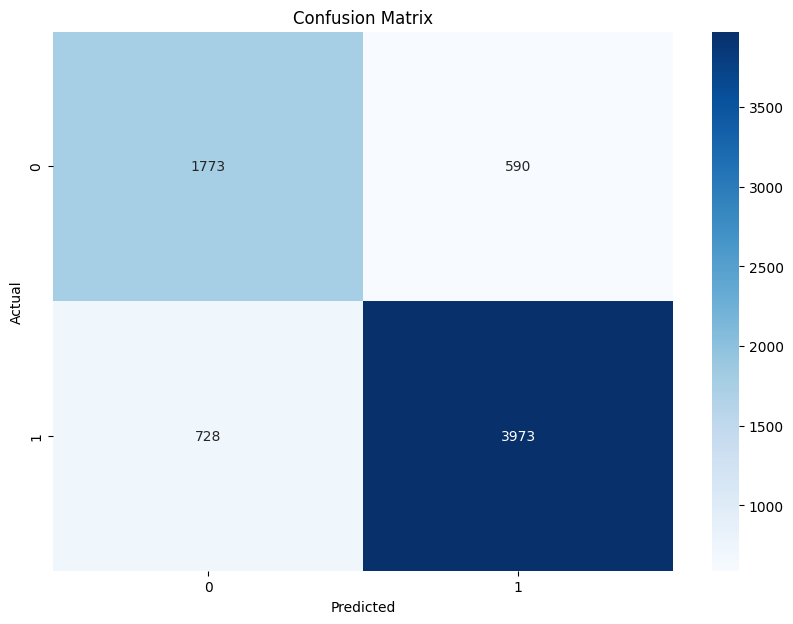

In [55]:
# Gerar a matriz
conf_matrix = confusion_matrix(y_test, test_predictions)

# Plotar a matriz
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [56]:
# Analisa quantos valores são 1 e quantos 0 das falhas
print(y_train.value_counts())

FALHA
1.0    18846
0.0     9407
Name: count, dtype: int64
